In [1]:
# loading necessary modules

import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
#ignoring uinmportant warnings

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('../Data/RestaurantVisitors.csv',index_col='date',parse_dates=True)
df.index.freq = 'D'

In [4]:
df.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65.0,25.0,67.0,139.0,296.0
2016-01-02,Saturday,0,na,24.0,39.0,43.0,85.0,191.0
2016-01-03,Sunday,0,na,24.0,31.0,66.0,81.0,202.0
2016-01-04,Monday,0,na,23.0,18.0,32.0,32.0,105.0
2016-01-05,Tuesday,0,na,2.0,15.0,38.0,43.0,98.0


For the exogenous variable, we will check whether or not the 'holiday' column actually affects the 'total' column.

In [5]:
df.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-05-27,Saturday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-28,Sunday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-29,Monday,1,Memorial Day,NaN,NaN,NaN,NaN,NaN
2017-05-30,Tuesday,0,na,NaN,NaN,NaN,NaN,NaN
2017-05-31,Wednesday,0,na,NaN,NaN,NaN,NaN,NaN


In [7]:
df1 = df.dropna()

In [8]:
df1.tail()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2017-04-18,Tuesday,0,na,30.0,30.0,13.0,18.0,91.0
2017-04-19,Wednesday,0,na,20.0,11.0,30.0,18.0,79.0
2017-04-20,Thursday,0,na,22.0,3.0,19.0,46.0,90.0
2017-04-21,Friday,0,na,38.0,53.0,36.0,38.0,165.0
2017-04-22,Saturday,0,na,97.0,20.0,50.0,59.0,226.0


In [9]:
df1.columns

Index(['weekday', 'holiday', 'holiday_name', 'rest1', 'rest2', 'rest3',
       'rest4', 'total'],
      dtype='object')

In [10]:
my_cols = ['rest1', 'rest2', 'rest3','rest4', 'total']
for col in my_cols:
    df1[col] = df1[col].astype('int')

In [11]:
df1.head()

,weekday,holiday,holiday_name,rest1,rest2,rest3,rest4,total
date,,,,,,,,
2016-01-01,Friday,1,New Year's Day,65,25,67,139,296
2016-01-02,Saturday,0,na,24,39,43,85,191
2016-01-03,Sunday,0,na,24,31,66,81,202
2016-01-04,Monday,0,na,23,18,32,32,105
2016-01-05,Tuesday,0,na,2,15,38,43,98


<AxesSubplot:xlabel='date'>

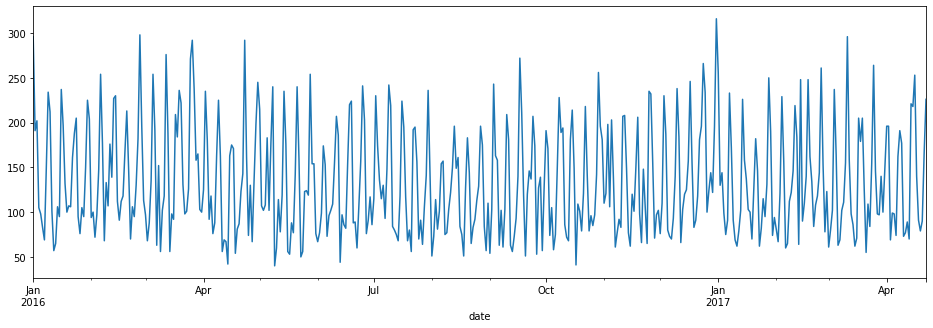

In [12]:
df1['total'].plot(figsize=(16,5))

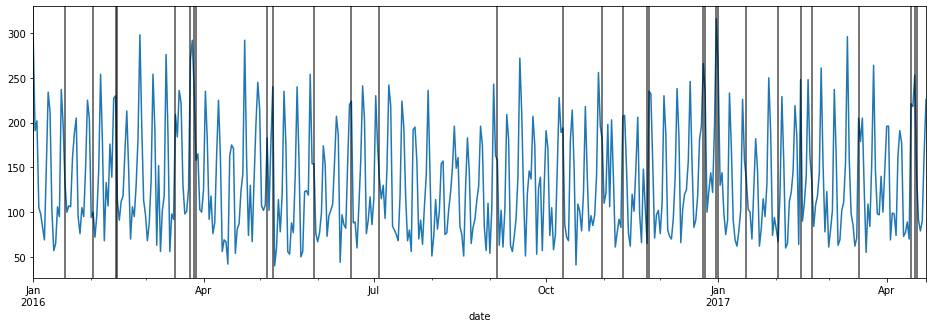

In [17]:
# marking holidays

ax = df1['total'].plot(figsize=(16,5))
for day in df1[df1['holiday']==1].index:
    ax.axvline(x=day,color='k',alpha=0.7)

From just the plot it is a little unclear whether or not there is a relation between the number of visitors and holidays.

In [19]:
# decomposing the data using seasonal_decompose

from statsmodels.tsa.seasonal import seasonal_decompose

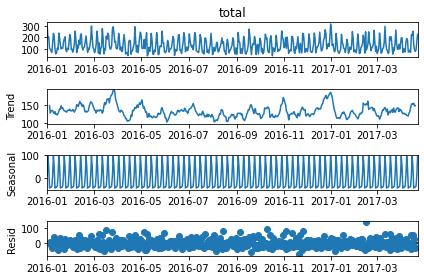

In [22]:
result = seasonal_decompose(df1['total'])
result.plot();

very strong seasonal component.

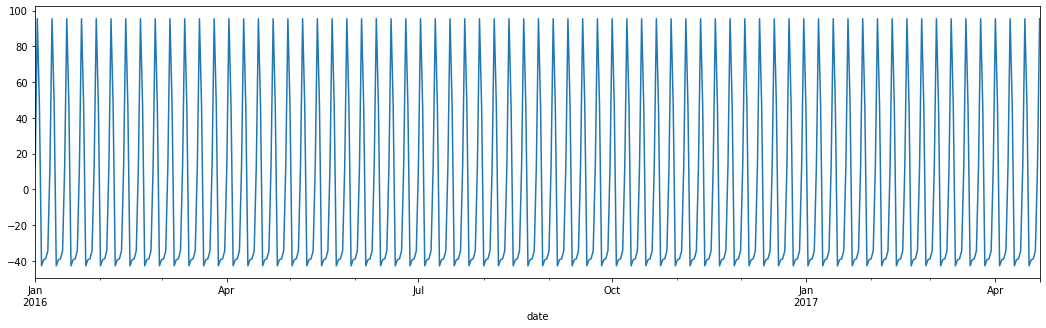

In [24]:
result.seasonal.plot(figsize=(18,5));

~4 seasonal periods per month, so the seasonality is weekly.

In [25]:
len(df1)

478

In [26]:
train = df1.iloc[:436]
test = df1.iloc[436:]

In [27]:
from pmdarima import auto_arima

In [29]:
auto_arima(df1['total'],seasonal=True,m=7,trace=True).summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=inf, Time=1.82 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=5269.484, Time=0.03 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=4916.749, Time=0.52 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=5049.644, Time=0.40 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=6126.084, Time=0.03 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=5200.790, Time=0.14 sec
 ARIMA(1,0,0)(2,0,0)[7] intercept   : AIC=4845.442, Time=1.59 sec
 ARIMA(1,0,0)(2,0,1)[7] intercept   : AIC=inf, Time=2.80 sec
 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=4826.165, Time=1.09 sec
 ARIMA(1,0,0)(0,0,1)[7] intercept   : AIC=5058.642, Time=0.49 sec
 ARIMA(1,0,0)(1,0,2)[7] intercept   : AIC=4949.949, Time=2.02 sec
 ARIMA(1,0,0)(0,0,2)[7] intercept   : AIC=4982.776, Time=0.99 sec
 ARIMA(1,0,0)(2,0,2)[7] intercept   : AIC=inf, Time=3.22 sec
 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=4787.767, Time=0.95 sec
 ARIMA(0,0,0)(0,0,1)[7] intercept   : AIC=5093.1

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                         y   No. Observations:                  478
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -2389.883
Date:                   Wed, 16 Dec 2020   AIC                           4787.767
Time:                           11:20:09   BIC                           4804.445
Sample:                                0   HQIC                          4794.324
                                   - 478                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      6.0342      2.001      3.015      0.003       2.112       9.956
ar.S.L7        0.9503      0.016     60.231      0.000       0.919       0.981
ma.S.L7       -0.7155      0.054    -13.167      0.000      -0.822      -0.609
sigma2      1318.3241     84.281     15.642      0.000    1153.137    1483.511
===================================================================================
Ljung-Box (L1) (Q):                  16.65   Jarque-Bera (JB):                59.38
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.86   Skew:                             0.73
Prob(H) (two-sided):                  0.33   Kurtosis:                         3.92
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [30]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [31]:
model = SARIMAX(train['total'],order=(0,0,0),seasonal_order=(1,0,1,7),enforce_invertibility=False)

In [32]:
results = model.fit()

In [33]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                 
=================================================================================
Dep. Variable:                     total   No. Observations:                  436
Model:             SARIMAX(1, 0, [1], 7)   Log Likelihood               -2165.369
Date:                   Wed, 16 Dec 2020   AIC                           4336.738
Time:                           11:27:18   BIC                           4348.970
Sample:                       01-01-2016   HQIC                          4341.565
                            - 03-11-2017                                         
Covariance Type:                     opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L7        0.9999   9.57e-05   1.04e+04      0.000       1.000       1.000
ma.S.L7       -0.9384      0.024    -39.206      0.000      -0.985      -0.891
sigma2      1111.7903     58.739     18.928      0.000     996.664    1226.916
===================================================================================
Ljung-Box (L1) (Q):                  15.40   Jarque-Bera (JB):                83.57
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.96   Skew:                             0.72
Prob(H) (two-sided):                  0.81   Kurtosis:                         4.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [34]:
start = len(train); end = start + len(test) - 1 
predictions = results.predict(start,end).rename('SARIMA Predictions')

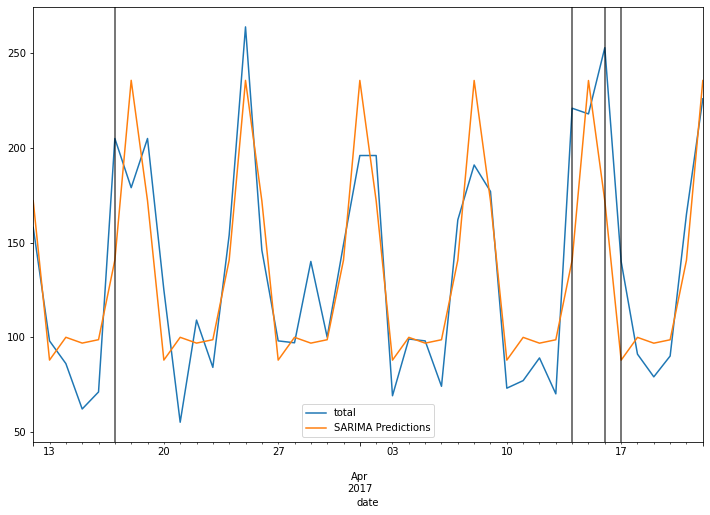

In [41]:
ax = test['total'].plot(figsize=(12,8),legend=True)
predictions.plot(legend=True)
for day in test[test['holiday']==1].index:
    ax.axvline(x=day,color='k',alpha=0.7)

So the days where our prediction trends seem to be a bit wrong seem to be around holidays. So adding an exogenous variable for holidays might help improve the results.

In [42]:
# evaluating predictions
from statsmodels.tools.eval_measures import rmse

In [43]:
error = rmse(test['total'],predictions)
print(error,error/test['total'].mean())

31.912695270772286 0.23768987433453378


so not very bad but also not very good

## Adding Exogenous variable

Note that for forecasting into the future using the SARIMAX with the exogenous variable we need to already know the exogenous variable into the future (or have a very good idea about it), we cannot make predictions for it.

In [44]:
auto_arima(df1['total'],X=df1[['holiday']],seasonal=True,m=7,trace=True).summary()

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=inf, Time=3.19 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=5235.582, Time=0.15 sec
 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=4811.782, Time=1.98 sec
 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=4969.638, Time=0.98 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=6068.575, Time=0.17 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=5171.193, Time=0.35 sec
 ARIMA(1,0,0)(2,0,0)[7] intercept   : AIC=inf, Time=2.36 sec
 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=4752.916, Time=1.50 sec
 ARIMA(1,0,0)(0,0,1)[7] intercept   : AIC=4990.373, Time=0.88 sec
 ARIMA(1,0,0)(2,0,1)[7] intercept   : AIC=inf, Time=2.84 sec
 ARIMA(1,0,0)(1,0,2)[7] intercept   : AIC=4817.738, Time=1.97 sec
 ARIMA(1,0,0)(0,0,2)[7] intercept   : AIC=4887.554, Time=1.65 sec
 ARIMA(1,0,0)(2,0,2)[7] intercept   : AIC=inf, Time=3.03 sec
 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=4829.769, Time=1.02 sec
 ARIMA(2,0,0)(1,0,1)[7] intercept   : AIC=5029.690, T

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                  478
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 7)   Log Likelihood               -2370.458
Date:                             Wed, 16 Dec 2020   AIC                           4752.916
Time:                                     11:49:26   BIC                           4777.934
Sample:                                 01-01-2016   HQIC                          4762.752
                                      - 04-22-2017                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     18.6740      2.898      6.444      0.000      12.994      24.354
holiday       51.7576      3.949     13.108      0.000      44.018      59.497
ar.L1          0.2860      0.040      7.119      0.000       0.207       0.365
ar.S.L7        0.7877      0.028     27.870      0.000       0.732       0.843
ma.S.L7       -0.2753      0.058     -4.767      0.000      -0.389      -0.162
sigma2      1005.6847     64.971     15.479      0.000     878.344    1133.025
===================================================================================
Ljung-Box (L1) (Q):                   1.67   Jarque-Bera (JB):                 8.42
Prob(Q):                              0.20   Prob(JB):                         0.01
Heteroskedasticity (H):               0.92   Skew:                             0.32
Prob(H) (two-sided):                  0.60   Kurtosis:                         3.12
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [45]:
# training the model

model = SARIMAX(train['total'],exog=train[['holiday']],
                order=(1,0,0),seasonal_order=(1,0,1,7),enforce_invertibility=False)
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                               total   No. Observations:                  436
Model:             SARIMAX(1, 0, 0)x(1, 0, [1], 7)   Log Likelihood               -2089.208
Date:                             Wed, 16 Dec 2020   AIC                           4188.417
Time:                                     11:53:37   BIC                           4208.805
Sample:                                 01-01-2016   HQIC                          4196.463
                                      - 03-11-2017                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
holiday       68.9354      3.773     18.271      0.000      61.541      76.330
ar.L1          0.2101      0.044      4.763      0.000       0.124       0.297
ar.S.L7        1.0000   5.78e-05   1.73e+04      0.000       1.000       1.000
ma.S.L7       -0.9581      0.022    -43.532      0.000      -1.001      -0.915
sigma2       779.3161     44.867     17.370      0.000     691.379     867.254
===================================================================================
Ljung-Box (L1) (Q):                   0.19   Jarque-Bera (JB):                20.47
Prob(Q):                              0.66   Prob(JB):                         0.00
Heteroskedasticity (H):               0.98   Skew:                             0.22
Prob(H) (two-sided):                  0.88   Kurtosis:                         3.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [47]:
# make predictions
start = len(train); end=start+len(test)-1
predictions = results.predict(start,end,exog=test[['holiday']]).rename('SARIMAX with Exogenous')

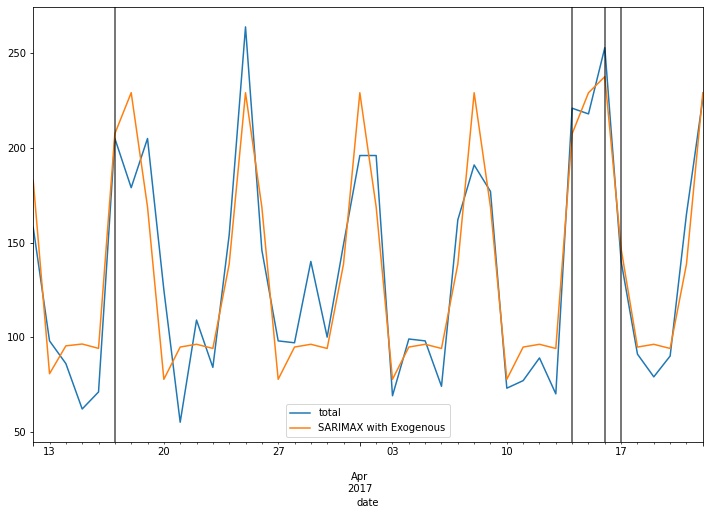

In [49]:
ax = test['total'].plot(figsize=(12,8),legend=True)
predictions.plot(legend=True)
for day in test[test['holiday']==1].index:
    ax.axvline(x=day,color='k',alpha=0.7)

It seems that we are predicting values for the holidays much better now

In [50]:
error = rmse(test['total'],predictions)
print(error,error/test['total'].mean())

22.929754406727664 0.17078377107333959


note the significant drop in the error.

### Forecasting into the future

In [51]:
model = SARIMAX(df1['total'],exog=df1[['holiday']],order=(1,0,0),seasonal_order=(1,0,1,7),enforce_invertibility=False)

In [52]:
results = model.fit()

In [54]:
# we will take our future exogenous variable values from the part of the original dataframe that had
# all NAN values, you can check that with df[478:]
exog_forecast = df[478:][['holiday']]

In [56]:
len(exog_forecast)

39

In [57]:
fcast = results.predict(start=len(df1),end=len(df1)+38,exog=exog_forecast).rename('Final SARIMAX Forecast')

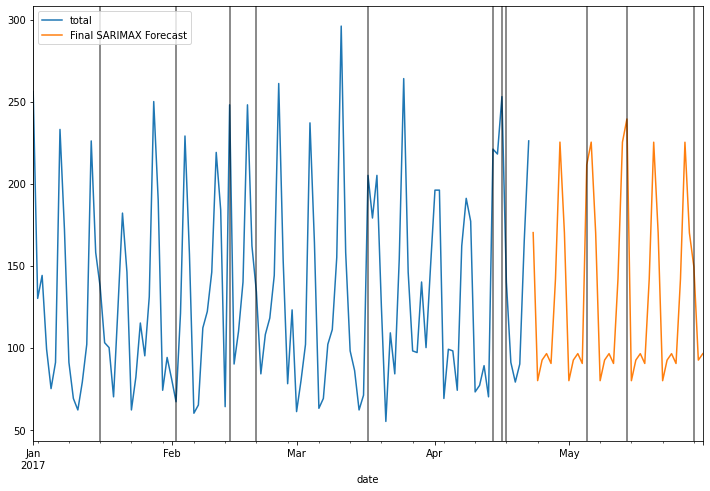

In [63]:
ax = df1['total'].loc['2017-01-01':].plot(figsize=(12,8),legend=True)
fcast.plot(legend=True)
for day in df[df['holiday']==1].index:
    ax.axvline(x=day,color='k',alpha=0.6)